In [51]:
import matplotlib.pyplot as plt
import torch
import pandas as pd
from scipy.misc import derivative
import time

In [52]:
data= pd.read_csv("MGH17_Data.txt",names=['y','x'], sep=" ")

data

,y,x
NaN,0.844,0.0
NaN,0.908,10.0
NaN,0.932,20.0
NaN,0.936,30.0
NaN,0.925,40.0
NaN,0.908,50.0
NaN,0.881,60.0
NaN,0.850,70.0
NaN,0.818,80.0
NaN,0.784,90.0


In [53]:
y = torch.from_numpy(data['y'].to_numpy(np.float64))
x = torch.from_numpy(data['x'].to_numpy(np.float64))

b = torch.tensor([50.0,150.0,-100.0,1,2],requires_grad=True)
b = torch.tensor([0.5,1.5,-1.0,0.01,0.02],requires_grad=True)

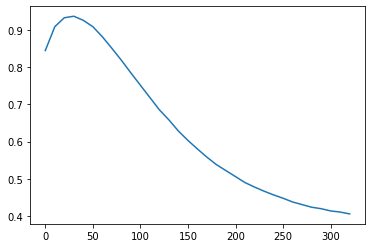

In [54]:
plt.plot(x.numpy(),y.numpy())

In [55]:
## Numerical Differentiation

b = np.array([0.5,1.5,-1.0,0.01,0.02]).reshape(-1,1)
# b = np.array([0.7,4]).reshape(-1,1)

x=x.detach().numpy()

u=0.1 #beta multiply identity matrix
beta = 10
V_prev = 0


def f0(b0):
    return  b0+b[1]*np.exp(-x*b[3])+b[2]*np.exp(-x*b[4])-y.detach().numpy()  
def f1(b1):
    return  b[0]+b1*np.exp(-x*b[3])+b[2]*np.exp(-x*b[4])-y.detach().numpy()  
def f2(b2):
    return  b[0]+b[1]*np.exp(-x*b[3])+b2*np.exp(-x*b[4])-y.detach().numpy()  
def f3(b3):
    return  b[0]+b[1]*np.exp(-x*b3)+b[2]*np.exp(-x*b[4])-y.detach().numpy()
def f4(b4):
    return  b[0]+b[1]*np.exp(-x*b[3])+b[2]*np.exp(-x*b4)-y.detach().numpy()

start_time = time.perf_counter()   
    
for c in range(500):

    y_pred = b[0]+b[1]*np.exp(-x*b[3])+b[2]*np.exp(-x*b[4])
    error = (y_pred - y.detach().numpy()).reshape(-1,1)
    
    d_b0 = derivative(f0,b[0] , dx=1e-6)
    d_b1 = derivative(f1,b[1] , dx=1e-6)
    d_b2 = derivative(f2,b[2] , dx=1e-6)
    d_b3 = derivative(f3,b[3] , dx=1e-6)
    d_b4 = derivative(f4,b[4] , dx=1e-6)
     
    jacobian = np.transpose(np.array([d_b0,d_b1,d_b2,d_b3,d_b4]))
    dParam = np.matmul(np.matmul(np.linalg.inv((np.matmul(np.transpose(jacobian),jacobian)+u*np.identity(len(b)))),np.transpose(jacobian)),error)
    b -= dParam
    V = np.sum(np.square(error))
    if(V > V_prev):
            u *= beta
    else:
            u /= beta
    V_prev = V
    print("c: ",c," error: ",V," B:", b)
    
    if V <  5.4648946979E-05:
        break
print("time taken to execute: ",time.perf_counter()-start_time)  
print("SD error is", np.std(np.square(error)))

c:  0  error:  0.8790262935446402  B: [[ 0.38815222]
 [ 1.4804005 ]
 [-1.02186983]
 [ 0.01205215]
 [ 0.02501127]]
c:  1  error:  0.002096810391093967  B: [[ 0.37530983]
 [ 1.48410365]
 [-1.01856198]
 [ 0.01189308]
 [ 0.02546915]]
c:  2  error:  0.00019491942501568296  B: [[ 0.36944432]
 [ 1.48947774]
 [-1.01422325]
 [ 0.01167803]
 [ 0.02490587]]
c:  3  error:  7.77859477118451e-05  B: [[ 0.36901472]
 [ 1.49391381]
 [-1.01781066]
 [ 0.01167742]
 [ 0.02482976]]
c:  4  error:  7.613797345257737e-05  B: [[ 0.36982501]
 [ 1.52797947]
 [-1.0525019 ]
 [ 0.01179969]
 [ 0.02451166]]
c:  5  error:  7.213686387115323e-05  B: [[ 0.37282029]
 [ 1.66809254]
 [-1.19493614]
 [ 0.01227397]
 [ 0.02331825]]
c:  6  error:  0.00027857107621423726  B: [[ 0.37490183]
 [ 1.84428075]
 [-1.37273907]
 [ 0.01271554]
 [ 0.02238399]]
c:  7  error:  0.0003038298303108665  B: [[ 0.37472993]
 [ 1.86206688]
 [-1.39039098]
 [ 0.0127116 ]
 [ 0.02243976]]
c:  8  error:  5.489736105985984e-05  B: [[ 0.37474644]
 [ 1.863800

In [56]:
def Jacobian(loss,params,numParams):
    
    jacobian = torch.empty(len(loss), numParams) 
    
    for i in range(len(loss)):
        
        loss[i].backward(retain_graph=True)
        
        for n in range(numParams):
            jacobian[i][n] = params.grad[n]
        params.grad.zero_()      
    return jacobian    

In [57]:
## Automatic Differentiation
num_param = len(b)
u=0.1 #beta multiply identity matrix
beta = 10
error_prev = 0
start_time = time.perf_counter()
for c in range(500):

    y_pred = b[0]+b[1]*torch.exp(-x*b[3])+b[2]*torch.exp(-x*b[4])

    loss = y_pred-y
    error = torch.sum(torch.square(loss)) #residual sum of squares
    print("",c," error is: ",error.detach().numpy()," b is ", b.detach().numpy())
    jacobian = Jacobian(loss,b,len(b))

    dParam = torch.matmul(torch.matmul(torch.inverse(torch.matmul(torch.transpose(jacobian,-1,0),jacobian)+u*torch.eye(num_param, num_param)),torch.transpose(jacobian,-1,0)),loss.float())
    with torch.no_grad():
        b -=dParam
    
        if(error > error_prev):
            u *= beta
        else:
            u /= beta
        error_prev = error
    if error<  5.4648946979E-05:#7.88539786689E+02:  given residual sum of squares
        break
print("time taken to execute: ",time.perf_counter()-start_time) 
print("SD error is", np.std(np.square(loss.detach().numpy())))

TypeError: exp(): argument 'input' (position 1) must be Tensor, not numpy.ndarray

In [ ]:
plt.plot(y_pred.detach(),'g', y,'r')